 ## Simulated Baseline Generation
 The simulated baseline curve for this example will be constructed using a simple polynomial curve that will
 be randomly adjusted between a minimum and maximum exponent value.  Two other baselines will also be used
 by adding or subtracting in a baseline Gaussian curve.  This baseline Gaussian was selected to overlap the signal
 region to make the generated data more complex.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
from scipy.stats import norm    

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


 The following plot shows the minimum and maximum baseline curves.

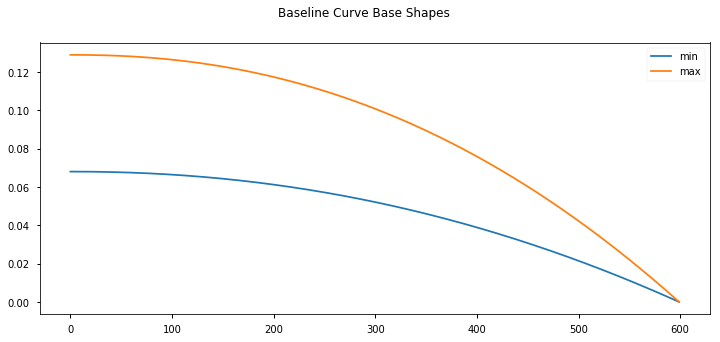

In [2]:
xnum = 600
np.random.seed(42)
x = np.arange(0, xnum, 1.0)
E1_ = (-1e-7*x**2.1)
E1F_ = E1_ + np.min(E1_)*-1.0
E2_ = (-1e-7*x**2.2)
E2F_ = E2_ + np.min(E2_)*-1.0


fig, axs = plt.subplots()
axs.plot(x, E1F_, label='min')
axs.plot(x, E2F_, label='max')
fig.suptitle('Baseline Curve Base Shapes')
plt.legend()


 The following plot shows the signal Gaussian curves along with the Baseline Gaussian curve.  The
 baseline Gaussian curve will be used simulate overlapping features and make a more complex curve.

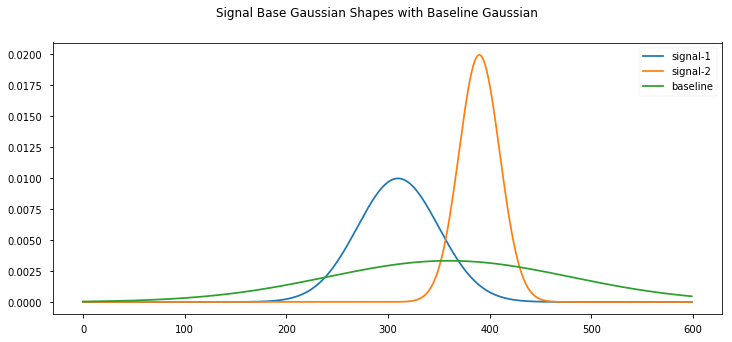

In [3]:
S_1 = norm.pdf(x, loc=310.0, scale=40.0)
S_2 = norm.pdf(x, loc=390.0, scale=20.0)
S_3 = norm.pdf(x, loc=360.0, scale=120.0)

fig, axs = plt.subplots()
axs.plot(x, S_1, label='signal-1')
axs.plot(x, S_2, label='signal-2')
axs.plot(x, S_3, label='baseline')
fig.suptitle('Signal Base Gaussian Shapes with Baseline Gaussian')
plt.legend()


 ## Baseline Curves for Dataset Generation
 This project will use three different algorithms for baseline curves that will be used to generate
 the simulated datasets.  The goal of this project is to determine how well each algorithm can handle
 these different signals with varying baselines.
 The following plots show the pure signal combined with each of the baseline curves at 25% and 75% concentration
 level.

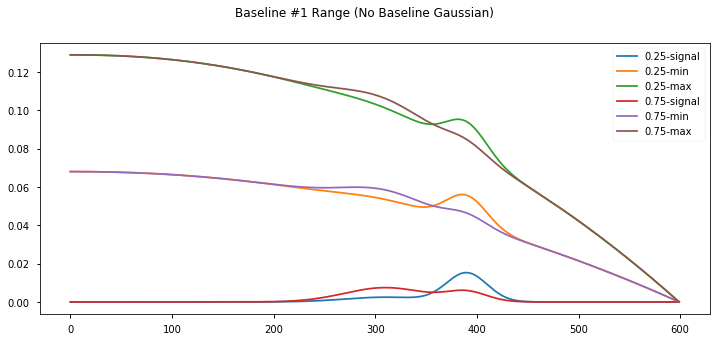

In [4]:
S_true = np.vstack((S_1, S_2))
C_true = np.array([[0.25, 0.75], [0.75, 0.25]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-signal'.format(C_true[i, 0]))       
    axs.plot(x, signal[i]+E1F_, label='{0:.2f}-min'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_, label='{0:.2f}-max'.format(C_true[i, 0]))  
fig.suptitle('Baseline #1 Range (No Baseline Gaussian)')      
plt.legend()


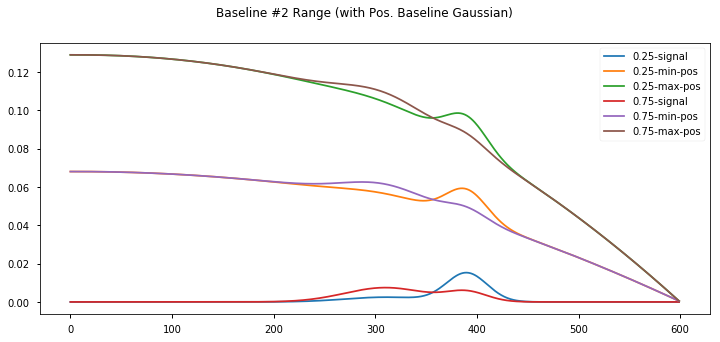

In [5]:
fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-signal'.format(C_true[i, 0]))       
    axs.plot(x, signal[i]+E1F_+S_3, label='{0:.2f}-min-pos'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_+S_3, label='{0:.2f}-max-pos'.format(C_true[i, 0]))  
fig.suptitle('Baseline #2 Range (with Pos. Baseline Gaussian)')      
plt.legend()


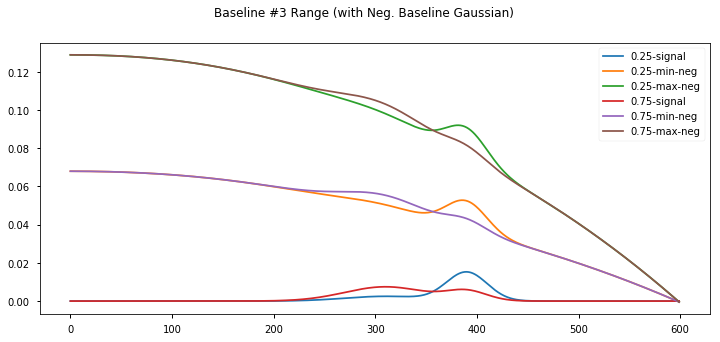

In [6]:
fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-signal'.format(C_true[i, 0]))       
    axs.plot(x, signal[i]+E1F_-S_3, label='{0:.2f}-min-neg'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_-S_3, label='{0:.2f}-max-neg'.format(C_true[i, 0]))  
fig.suptitle('Baseline #3 Range (with Neg. Baseline Gaussian)')      
plt.legend()
